## Second step

In [1]:
opt_bids = [5.92895410817995,  2.682396521822428,  2.9540452274843294]
opt_price = 6.541655879916771

### UCB like learner

In [9]:
import numpy as np
from matplotlib import pyplot as plt 
from learners import UCB1_Learner
from environment import Environment

UCB1 = UCB1_Learner()

T = 365
env = Environment()
regret = []

for day in range(T):
    bids, price = UCB1.pull_arm()
    reward = env.round(bids, price)
    UCB1.update(bids, price, reward)
    regret.append(sum(env.round(opt_bids, opt_price)) - sum(reward))


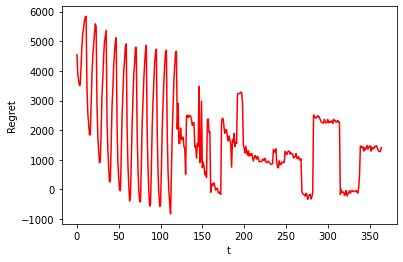

In [11]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(X, regret , 'r')

plt.show()

In [8]:
regret[-10:]

[-599.8878265327257,
 -542.73000586938,
 -584.4151005935801,
 -450.1891987171266,
 -618.3938691686235,
 -615.0696404623104,
 -526.5547981902109,
 -482.8304470829007,
 -567.6116556605903,
 -629.2287788533995]

### Gaussian process optimizer

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from learners import GP_Learner
from environment import Environment
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

opt_bids = [5.92895410817995,  2.682396521822428,  2.9540452274843294]
opt_price = 6.541655879916771

bids = np.array([1.0, 1.0, 1.0])
price = 4.5      #Initial Price
T = 365

env = Environment()
gp_learner = GP_Learner()
regrets = [] 
sols = []

for t in tqdm(range(T)):
    outcome = sum(env.round(bids, price))
    
    gp_learner.fit(bids, price, outcome)

    bids, price = gp_learner.optimize()
    
    sols.append((bids ,price))
    regrets.append(sum(env.round(opt_bids, opt_price)) - outcome)

100%|██████████| 365/365 [01:21<00:00,  4.50it/s]


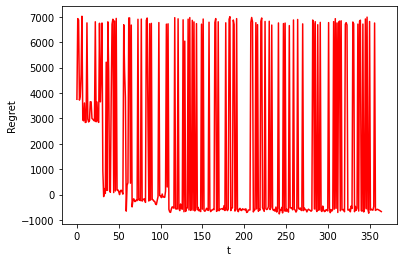

In [2]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(X, regrets , 'r')

plt.show()

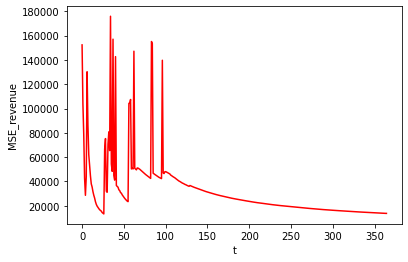

In [3]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("MSE_revenue")
plt.plot(X, gp_learner.error , 'r')

plt.show()

In [4]:
gp_learner.error[-10:]

[14085.069674215729,
 14045.17242386328,
 14007.984392114475,
 13969.381303710214,
 13930.297209397564,
 13891.610748570394,
 13853.667116079605,
 13819.170439531636,
 13781.6780501384,
 13767.91832572598]

In [20]:
import random
random.uniform(0, 1)

0.07026965706349497

## Learning the Revenue

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

class Learner():

    def __init__(self,   theta = 1.0, l = 1.0, noise_std = 5.0):
        self.x_obs = np.zeros(4)
        self.y_obs = np.zeros(1)

        self.kernel = C(theta, (1e-2, 1e2)) * RBF(1, (1e-2, 1e2)) 
        self.gp = GaussianProcessRegressor(kernel = self.kernel, alpha = 2, normalize_y = False, n_restarts_optimizer = 3)
    
    def fit(self, x, y):
        self.x_obs = np.vstack((self.x_obs, x))
        self.y_obs = np.append((self.y_obs , y))
        X = self.x_obs
        Y = self.y_obs
         µñbvcb